In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

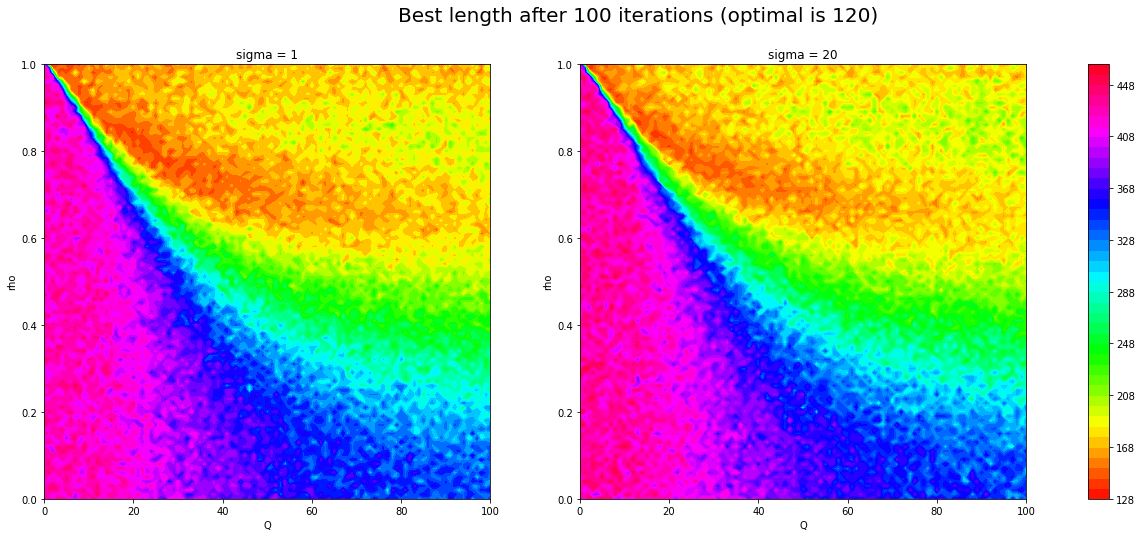

In [2]:
df = pd.read_csv('results/good/sigma100iutes20ants.csv')
df = df.groupby(['sigma', 'rho', 'Q']).mean().reset_index()
sigma1 = df[df['sigma'] == 1]
sigma20 = df[df['sigma'] == 20]
sigma1 = sigma1.pivot(index='rho', columns='Q', values='bestLength')
sigma20 = sigma20.pivot(index='rho', columns='Q', values='bestLength')

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

fig.suptitle('Best length after 100 iterations (optimal is 120)', fontsize=20)

X1=sigma1.columns.values
Y1=sigma1.index.values
Z1=sigma1.values
axs[0].set_title('sigma = 1')
axs[0].set_xlabel('Q')
axs[0].set_ylabel('rho')
cs1 = axs[0].contourf(X1,Y1,Z1,40, cmap='hsv')

X20=sigma20.columns.values
Y20=sigma20.index.values
Z20=sigma20.values
axs[1].set_title('sigma = 20')
axs[1].set_xlabel('Q')
axs[1].set_ylabel('rho')
cs2 = axs[1].contourf(X20,Y20,Z20,40, cmap='hsv')

plt.colorbar(cs2, ax=axs)
plt.show()

c:\Users\javie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Q', ylabel='bestLength'>

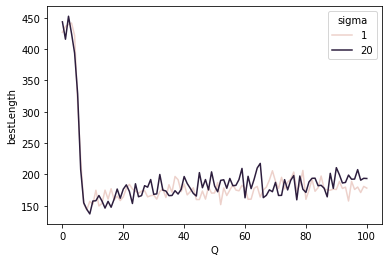

In [3]:
df = df.groupby(['sigma', 'rho', 'Q']).mean().reset_index()
df2 = df[df['rho']==0.93]
sns.lineplot(df2['Q'], df2['bestLength'], hue=df2['sigma'])

- Check greedy solution
- Rho = 0.9, 1 Q = 1, 10
- 200 iters, 20 sima 
- 1 ant, 2 ants, 20 ants 

### Zoom

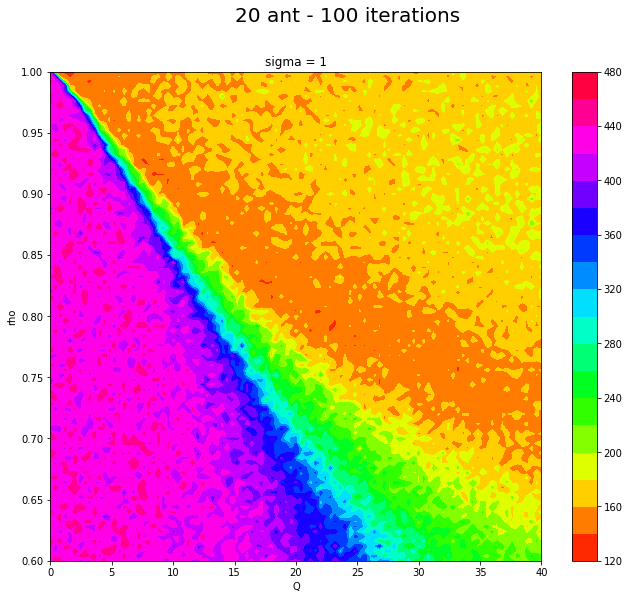

In [4]:
df = pd.read_csv('results/good/heatmap-zoom.csv')
df = df.groupby(['rho', 'Q']).mean().reset_index()

heat = df.pivot(index='rho', columns='Q', values='bestLength')
fig, axs = plt.subplots(1, 1, figsize=(11, 9))

X1=heat.columns.values
Y1=heat.index.values
Z1=heat.values
fig.suptitle('20 ant - 100 iterations', fontsize=20)
axs.set_title('sigma = 1')
axs.set_xlabel('Q')
axs.set_ylabel('rho')
cs = axs.contourf(X1,Y1,Z1,16,cmap='hsv')
plt.colorbar(cs, ax=axs)
plt.show()

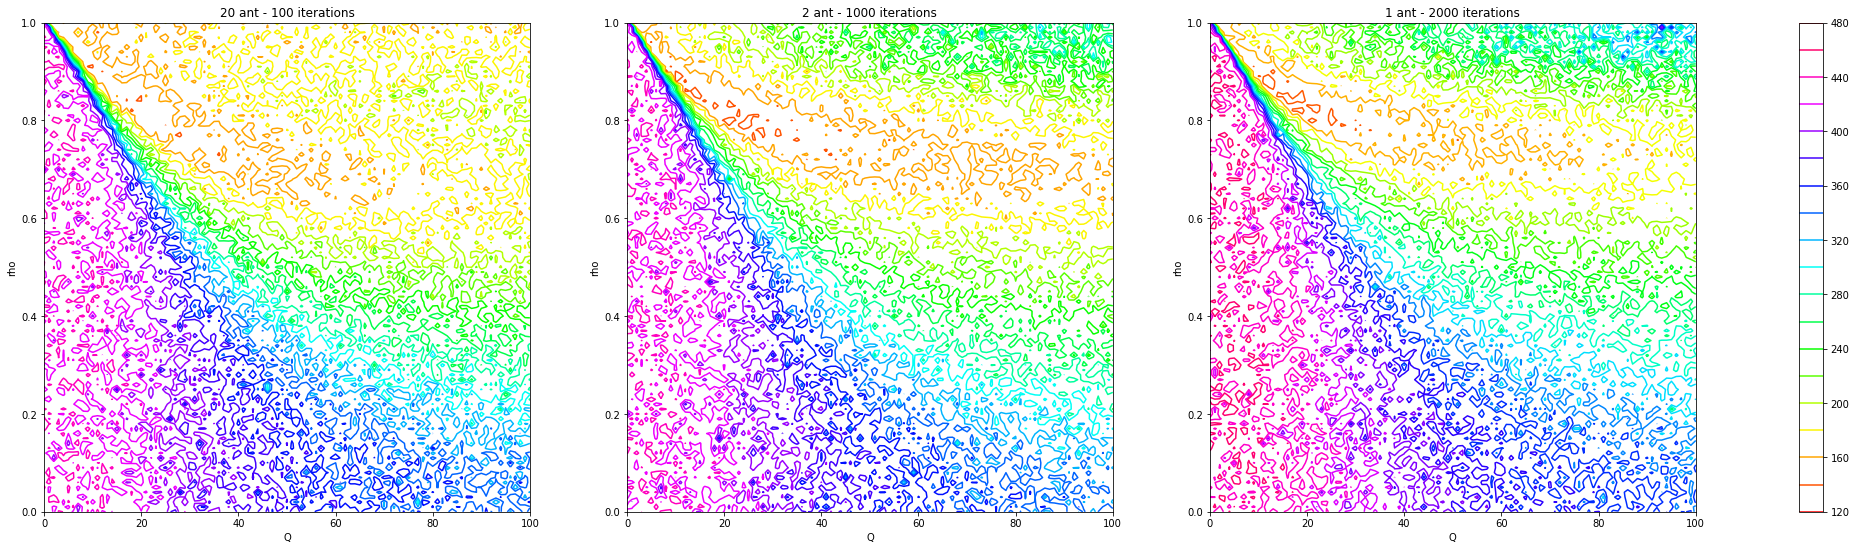

In [5]:
df20 = pd.read_csv('results/good/heatmap-ant20.csv')
sigma1 = df20[df20['sigma'] == 1]
df2 = pd.read_csv('results/good/heatmap-ant2.csv')
df1 = pd.read_csv('results/good/heatmap-ant1.csv')

fig, axs = plt.subplots(1, 3, figsize=(37, 9))
sigma1 = sigma1.groupby(['rho', 'Q']).mean().reset_index()
df2 = df2.groupby(['rho', 'Q']).mean().reset_index()
df1 = df1.groupby(['rho', 'Q']).mean().reset_index()

sigma1 = sigma1.pivot(index='rho', columns='Q', values='bestLength')
df2 = df2.pivot(index='rho', columns='Q', values='bestLength')
df1 = df1.pivot(index='rho', columns='Q', values='bestLength')

regs = 16
cmap = 'hsv'

X20=sigma1.columns.values
Y20=sigma1.index.values
Z20=sigma1.values
axs[0].set_title('20 ant - 100 iterations')
axs[0].set_xlabel('Q')
axs[0].set_ylabel('rho')
cs1 = axs[0].contour(X20,Y20,Z20,regs,cmap=cmap)

X2=df2.columns.values
Y2=df2.index.values
Z2=df2.values
axs[1].set_title('2 ant - 1000 iterations')
axs[1].set_xlabel('Q')
axs[1].set_ylabel('rho')
cs2 = axs[1].contour(X2,Y2,Z2,regs,cmap=cmap)

X1=df1.columns.values
Y1=df1.index.values
Z1=df1.values
axs[2].set_title('1 ant - 2000 iterations')
axs[2].set_xlabel('Q')
axs[2].set_ylabel('rho')
cs3 = axs[2].contour(X1,Y1,Z1,regs,cmap=cmap)

plt.colorbar(cs2, ax=axs)
plt.show()

<AxesSubplot:xlabel='bestLength', ylabel='Density'>

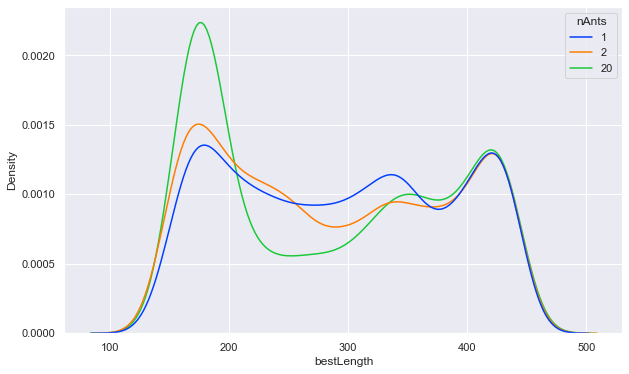

In [6]:
df20 = pd.read_csv('results/good/heatmap-ant20.csv')
df20 = df20[df20['sigma'] == 1]
df20['nAnts'] = 20
df2 = pd.read_csv('results/good/heatmap-ant2.csv')
df2['nAnts'] = 2
df1 = pd.read_csv('results/good/heatmap-ant1.csv')
df1['nAnts'] = 1

df_merged = pd.concat([df1, df2, df20])
# df_merged = df_merged[df_merged['rho'] > 0.5]
# df_merged = df_merged[df_merged['Q'] < 50]

# figure size params
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(data=df_merged, x="bestLength", hue="nAnts", palette='bright')

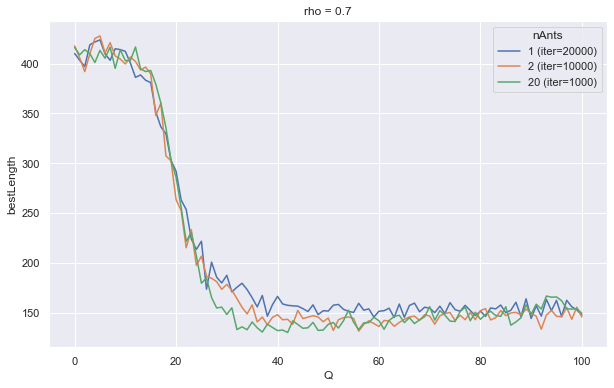

In [7]:
df1 = pd.read_csv('results/good/ant1-rho-fix.csv')
df1['nAnts'] = '1 (iter=20000)'
df2 = pd.read_csv('results/good/ant2-rho-fix.csv')
df2['nAnts'] = '2 (iter=10000)'
df20 = pd.read_csv('results/good/ant20-rho-fix.csv')
df20['nAnts'] = '20 (iter=1000)'

df_merged = pd.concat([df1, df2, df20])

sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=df_merged, x='Q', y = 'bestLength', hue=df_merged['nAnts']).set(title='rho = 0.7')
plt.show()

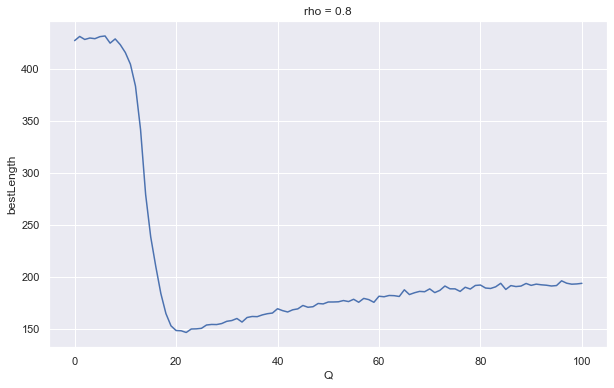

In [8]:
df = pd.read_csv('results/good/smooth20ant.csv')
df = df.groupby(['rho', 'Q']).mean().reset_index()

sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=df, x='Q', y = 'bestLength').set(title='rho = 0.8')
plt.show()

<AxesSubplot:xlabel='bestLength', ylabel='Density'>

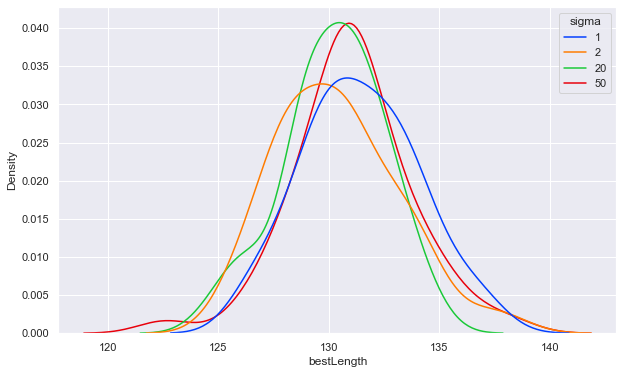

In [9]:
df = pd.read_csv('results/good/ant20-.sigmas.csv')
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(data=df, x="bestLength", hue="sigma", palette='bright')

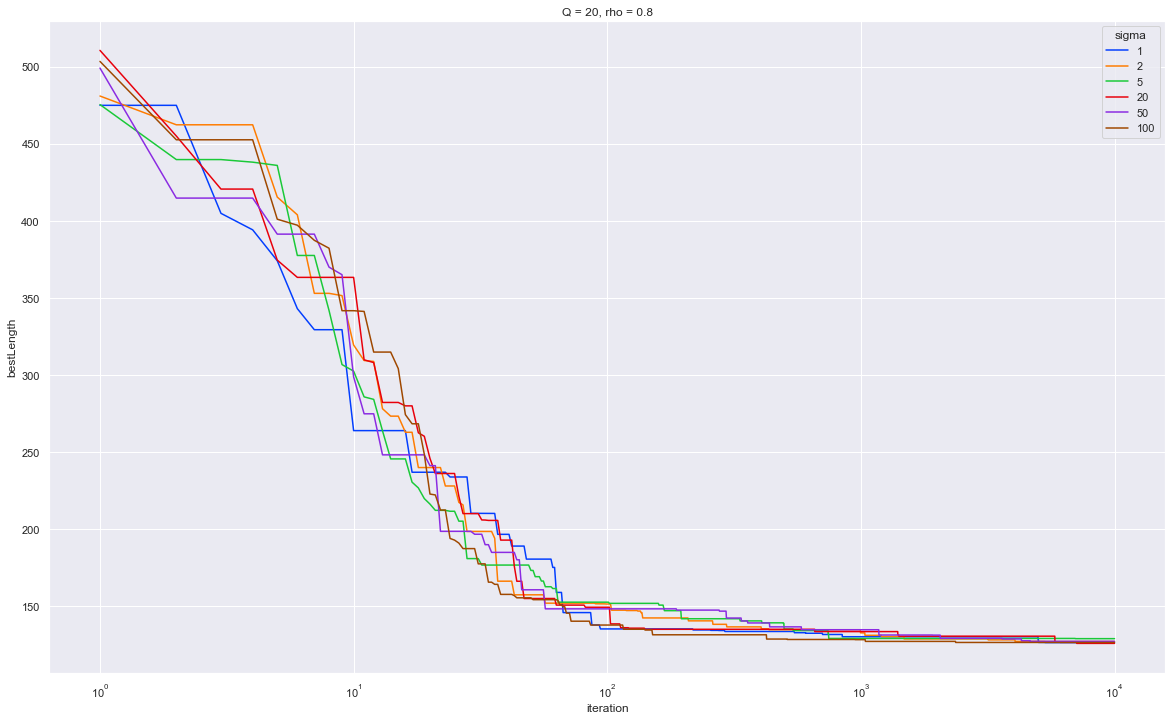

In [10]:
df = pd.read_csv('results/good/smooth-20ants-10k-iters.csv')
#df = df[df['iteration'] < 100]

sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data=df, x='iteration', y = 'bestLength', hue='sigma', palette='bright').set(title='Q = 20, rho = 0.8')
plt.xscale('log')
plt.show()

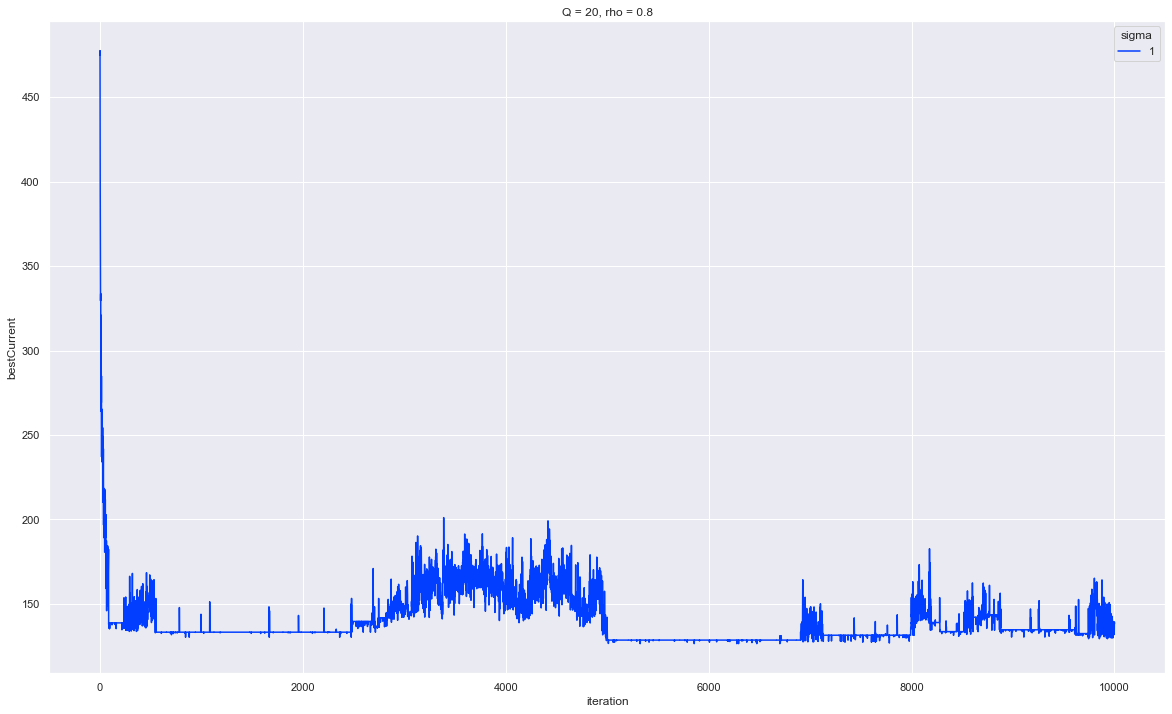

In [11]:

sns.lineplot(data=df[df['sigma']==1], x='iteration', y = 'bestCurrent', hue='sigma',palette='bright').set(title='Q = 20, rho = 0.8')
plt.show()

In [12]:
df[df['iteration'] == 10000]

,iteration,sigma,rho,Q,bestLength,bestCurrent,nBestPathAnts,nBestCurrentPathAnts
59994,10000,1,0.8,20,126.420598,138.158955,0,1
59995,10000,2,0.8,20,127.108593,144.317336,0,1
59996,10000,5,0.8,20,128.991601,144.370942,0,1
59997,10000,20,0.8,20,125.920650,130.814820,0,1
59998,10000,50,0.8,20,127.256355,142.292906,0,1
59999,10000,100,0.8,20,126.523666,128.207997,0,2


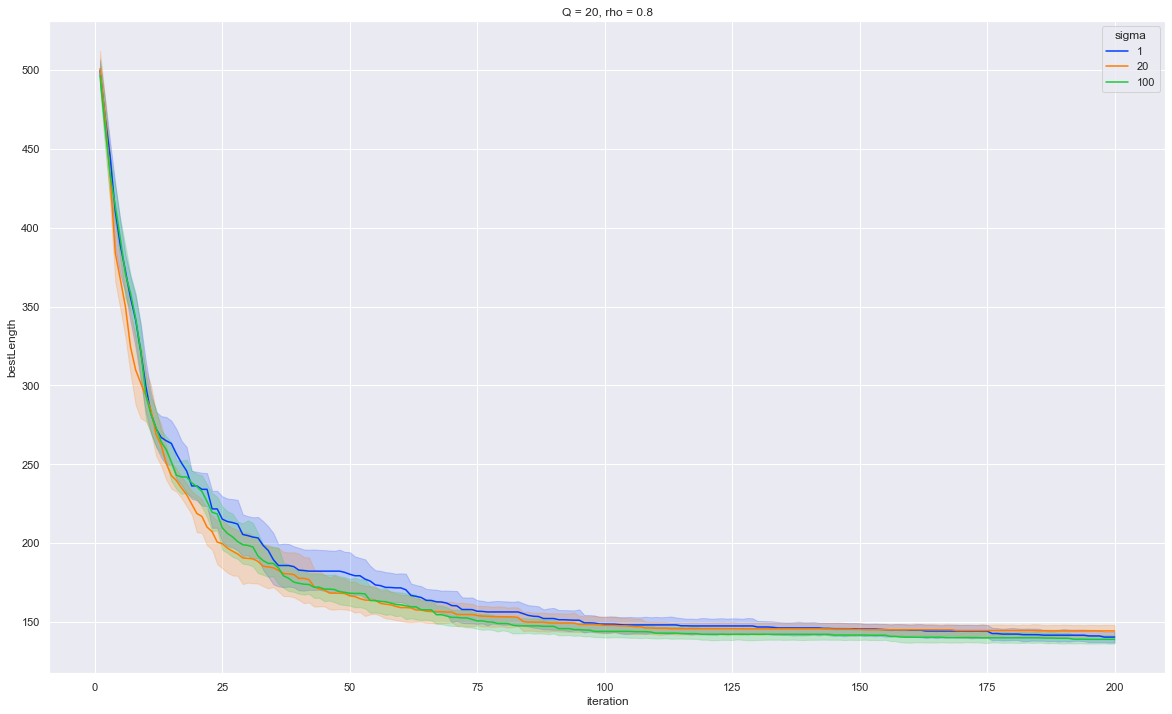

In [13]:
df = pd.read_csv('results/good/smoooooth-test1.csv')
sns.lineplot(data=df, x='iteration', y = 'bestLength', hue='sigma',palette='bright').set(title='Q = 20, rho = 0.8')
plt.show()

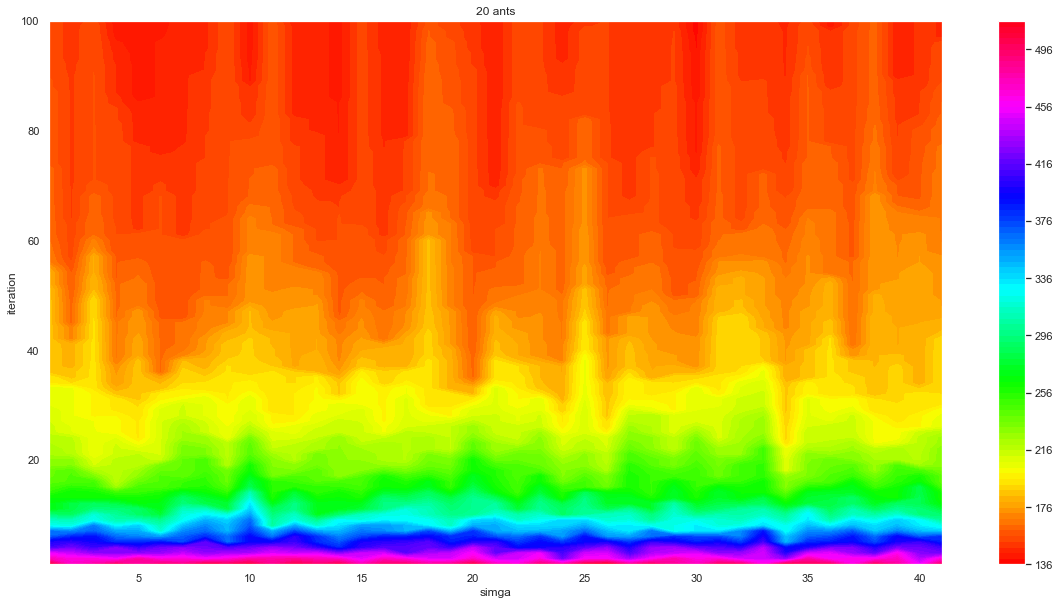

In [14]:
df = pd.read_csv('results/good/sigma-steps.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contourf(X,Y,Z,100,cmap='hsv')

plt.colorbar(cs, ax=axs)
plt.show()

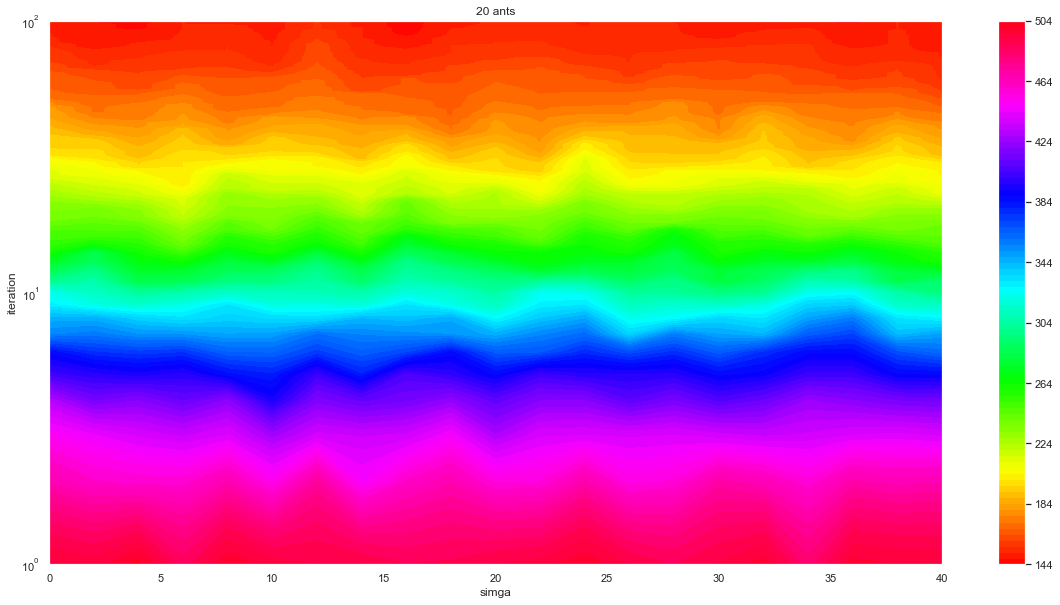

In [15]:
df = pd.read_csv('results/good/sigma-steps-10-copies.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contourf(X,Y,Z,100,cmap='hsv')

plt.yscale('log')
plt.colorbar(cs, ax=axs)
plt.show()

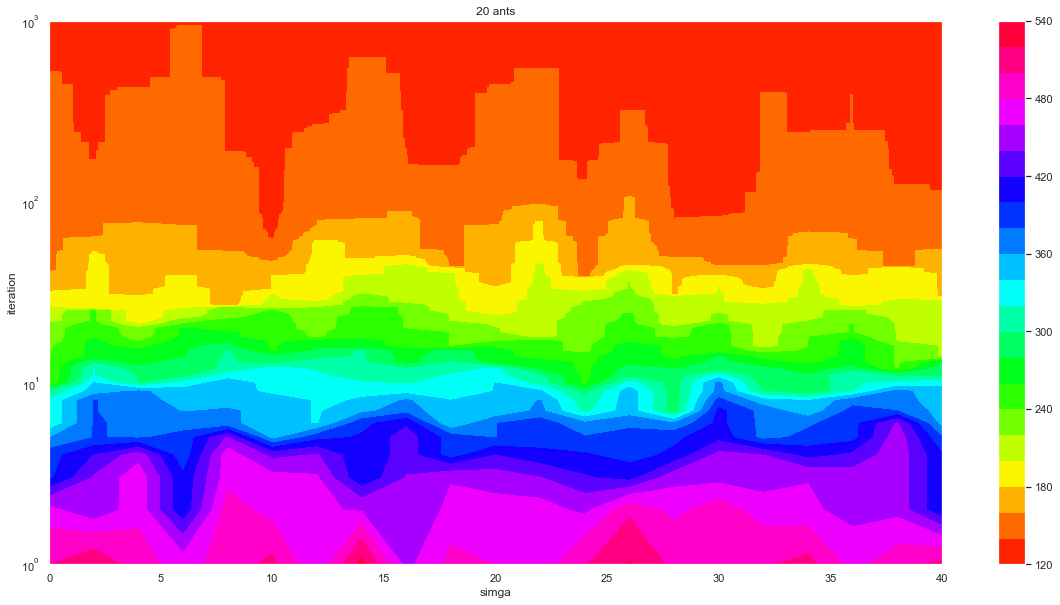

In [16]:
df = pd.read_csv('results/good/sigmas-1000iter.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contourf(X,Y,Z,20,cmap='hsv')

plt.yscale('log')
plt.colorbar(cs, ax=axs)
plt.show()

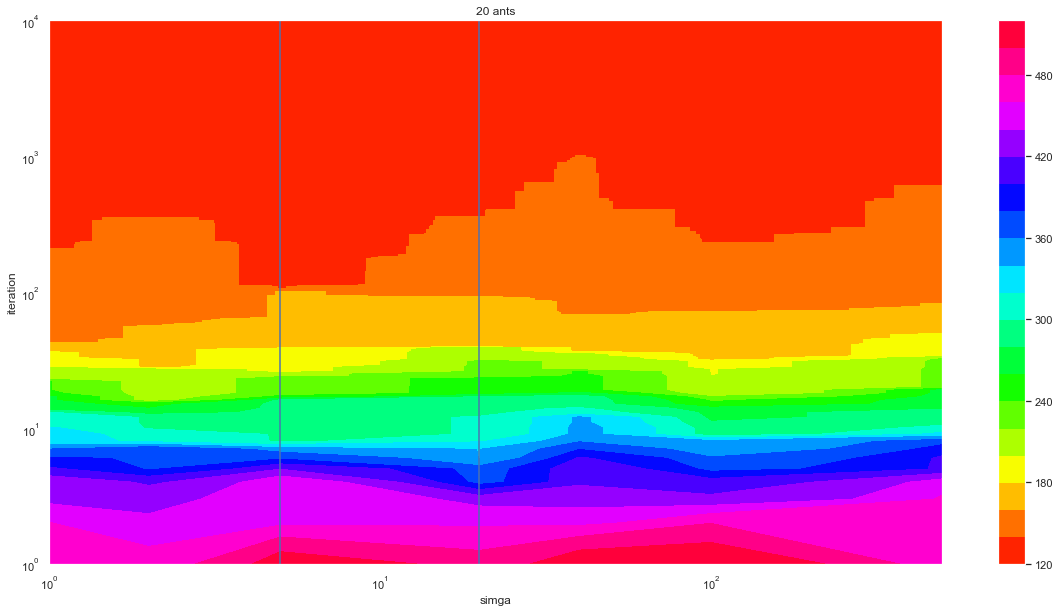

In [17]:
df = pd.read_csv('results/good/10k-iter-sigmas.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contourf(X,Y,Z,20,cmap='hsv')

plt.yscale('log')
plt.xscale('log')
plt.colorbar(cs, ax=axs)
plt.axvline(x = 20, color = 'b', label = 'axvline - full height')
plt.axvline(x = 5, color = 'b', label = 'axvline - full height')
plt.show()

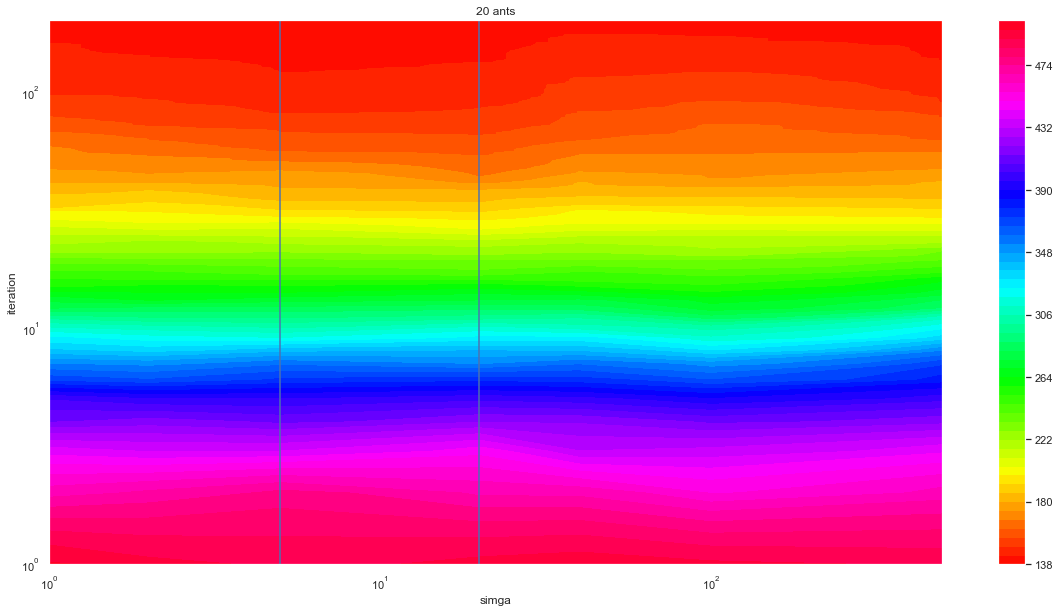

In [18]:
df = pd.read_csv('results/good/many-copies-sigma-log.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contourf(X,Y,Z,70,cmap='hsv')

plt.yscale('log')
plt.xscale('log')
plt.colorbar(cs, ax=axs)
plt.axvline(x = 20, color = 'b', label = 'axvline - full height')
plt.axvline(x = 5, color = 'b', label = 'axvline - full height')
plt.show()

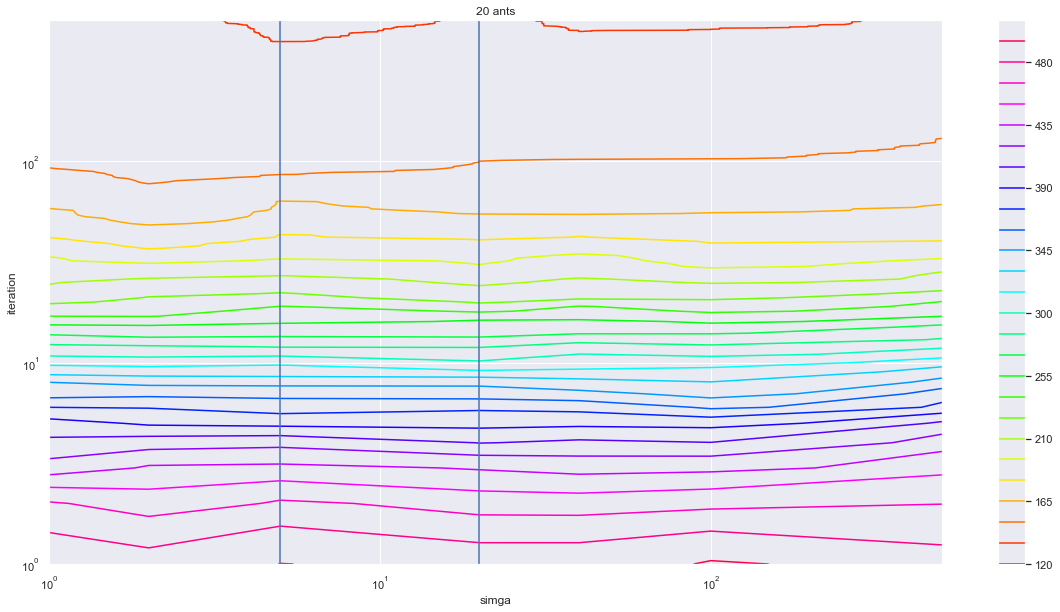

In [19]:
df = pd.read_csv('results/good/20copies-500iters-sgima.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contour(X,Y,Z,25,cmap='hsv')

plt.yscale('log')
plt.xscale('log')
plt.colorbar(cs, ax=axs)
plt.axvline(x = 20, color = 'b', label = 'axvline - full height')
plt.axvline(x = 5, color = 'b', label = 'axvline - full height')
plt.show()

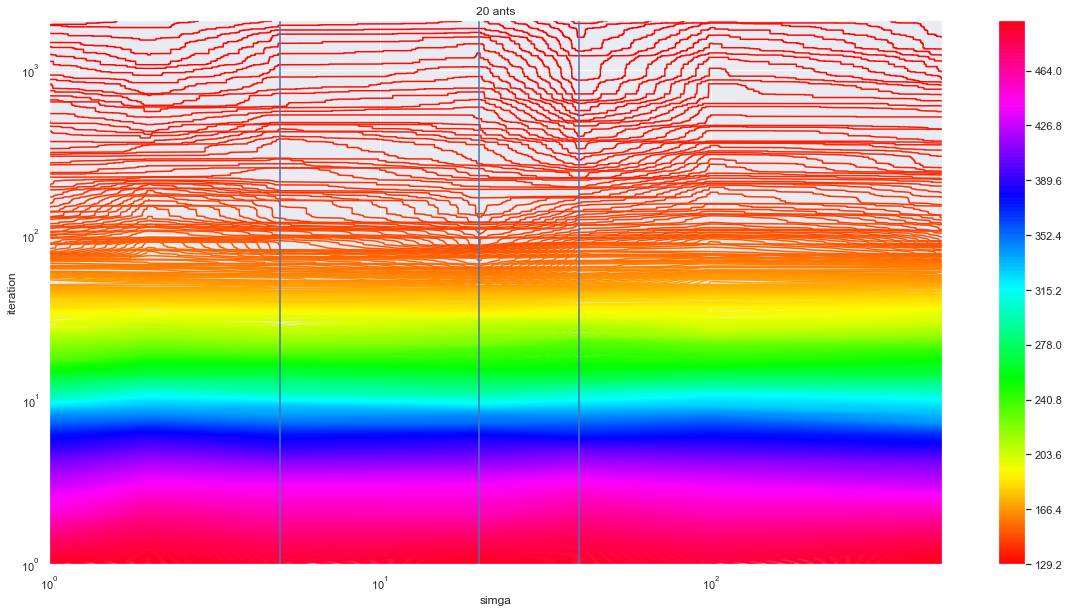

In [20]:
df = pd.read_csv('results/good/2000iters-20copies-sigmas.csv')
df = df.groupby(['iteration', 'sigma']).mean().reset_index()
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('simga')
axs.set_ylabel('iteration')
cs = axs.contour(X,Y,Z,1000,cmap='hsv')

plt.yscale('log')
plt.xscale('log')
plt.colorbar(cs, ax=axs)
plt.axvline(x = 40, color = 'b', label = 'axvline - full height')
plt.axvline(x = 20, color = 'b', label = 'axvline - full height')
plt.axvline(x = 5, color = 'b', label = 'axvline - full height')
plt.show()

<AxesSubplot:xlabel='iteration', ylabel='bestLength'>

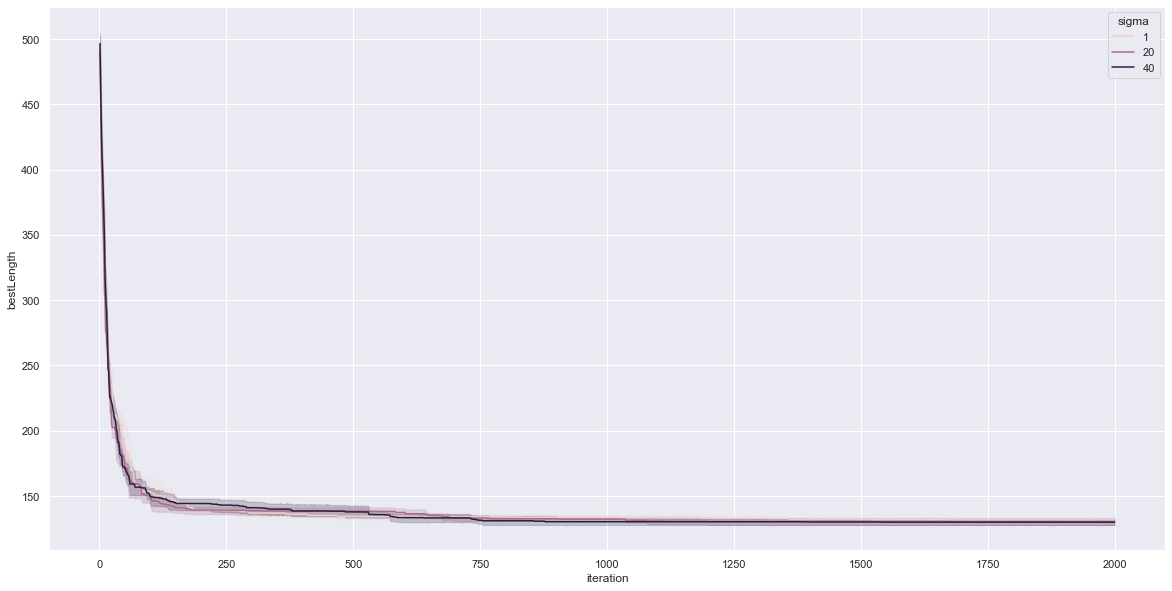

In [21]:
df = pd.read_csv('results/heatmap-test.csv')
df = df[df['sigma'] < 1000]

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(data=df, x='iteration', y='bestLength', hue='sigma', ax=axs)

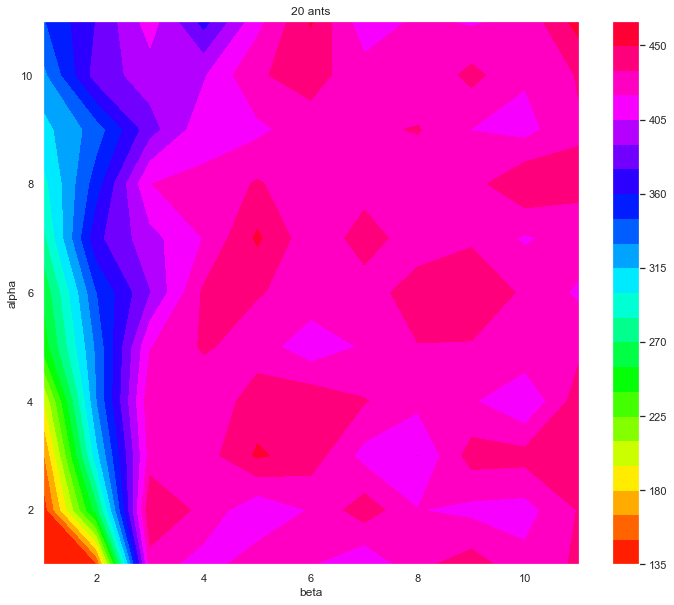

In [30]:
df = pd.read_csv('results/alpha-beta1.csv')
df = df[ df['iteration'] == 100]
df = df.groupby(['iteration', 'alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(12, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z,25,cmap='hsv')

plt.colorbar(cs, ax=axs)
plt.show()

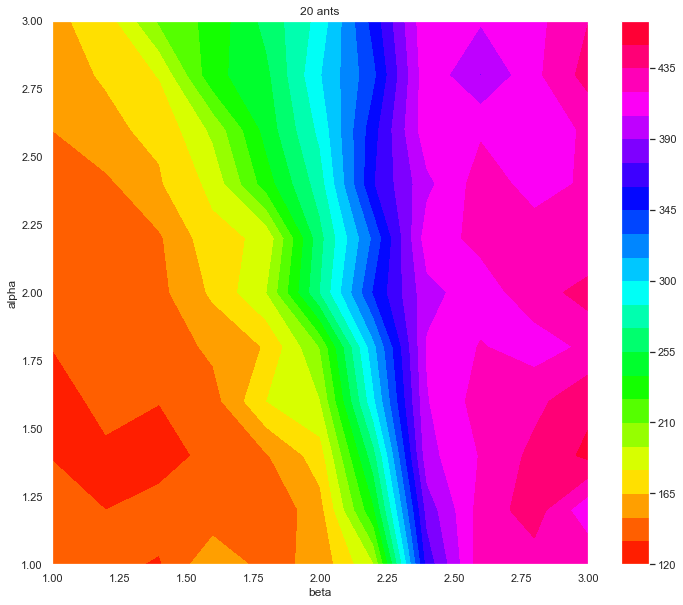

In [35]:
df = pd.read_csv('results/alpha-beta2.csv')
df = df[ df['iteration'] == 100]
df = df.groupby(['iteration', 'alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(12, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z,25,cmap='hsv')

plt.colorbar(cs, ax=axs)
plt.show()

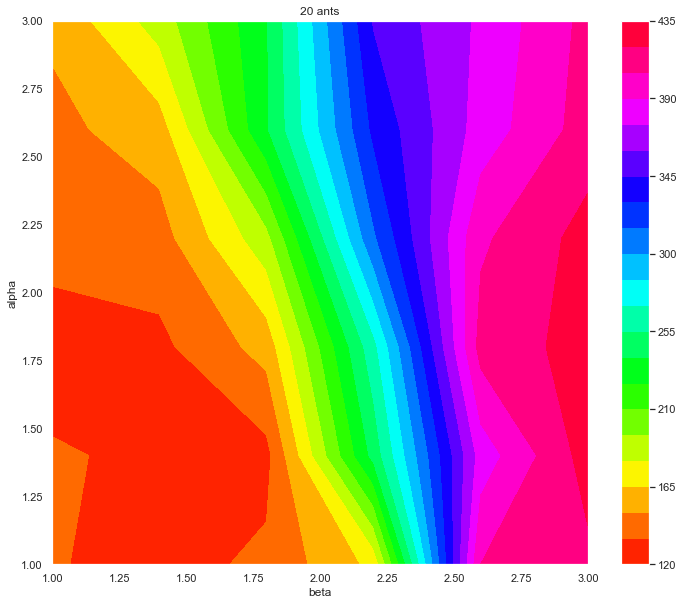

In [38]:
df = pd.read_csv('results/alpha-beta-478iters.csv')
df = df[ df['iteration'] == 478]
df = df.groupby(['iteration', 'alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')

fig, axs = plt.subplots(1, 1, figsize=(12, 10))

X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title('20 ants')
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z,25,cmap='hsv')

plt.colorbar(cs, ax=axs)
plt.show()